In [1]:
#importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#saving the csv as a dataframe
df = pd.read_csv('coursework_other.csv')

In [3]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
print(len(df.columns))

5


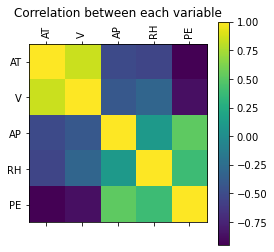

In [55]:
#plot to show how each variable is correlated with each other
plt.matshow(df.corr())
plt.xticks(np.arange(5), df.columns, rotation=90)
plt.yticks(np.arange(5), df.columns, rotation=0)
plt.colorbar()
plt.title("Correlation between each variable")

plt.show()

In [6]:
#splitting the csv file and saving X variables (AT, V, AP, RH) into a separate df to the target y variable(PE)
X = np.array(df[["AT", "V", "AP", "RH"]])
y = np.array(df["PE"])

In [7]:
#importing the train_test_split function to use it to split the variables into a training and test set,
#I used test size = 0.2 for 80% for training data and 20% for test with random state = 42 to keep the same dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42)
Xtr, X_val, ytr, y_val = train_test_split(X_train, y_train, test_size = 0.2, shuffle = True, random_state = 42)

In [70]:
#checking the shape of eaach dataset so I can understand how many datapoints are in each dataset for future purposes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of Xtr:", Xtr.shape)
print("Shape of ytr:", ytr.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (7654, 4)
Shape of y_train: (7654,)
Shape of X_test: (1914, 4)
Shape of y_test: (1914,)
Shape of Xtr: (6123, 4)
Shape of ytr: (6123,)
Shape of X_val: (1531, 4)
Shape of y_val: (1531,)


In [56]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
linreg.score(X_test, y_test)

print(f"Score: {linreg.score(X_test, y_test)}")
print(y_pred)

Score: 0.9301046431962188
[455.68020791 438.73212215 434.16444    ... 482.16817365 435.41524413
 458.76150613]


In [57]:
#looping through each datapoint in X_test and comparing the predicted value using linear regression with the true value
for i in range(len(X_test)):
    x = X_test[i].reshape(1, -1)  # Reshape the data point to a 2D array
    y_true = y_test[i]
    y_pred = linreg.predict(x)
    print(f"Data point {i+1}: true value = {y_true:.2f}, predicted value = {y_pred[0]:.2f}")


Data point 1: true value = 455.27, predicted value = 455.68
Data point 2: true value = 436.31, predicted value = 438.73
Data point 3: true value = 440.68, predicted value = 434.16
Data point 4: true value = 434.40, predicted value = 438.77
Data point 5: true value = 482.06, predicted value = 479.89
Data point 6: true value = 436.07, predicted value = 439.50
Data point 7: true value = 452.48, predicted value = 448.84
Data point 8: true value = 435.22, predicted value = 434.81
Data point 9: true value = 432.93, predicted value = 435.10
Data point 10: true value = 466.46, predicted value = 472.95
Data point 11: true value = 452.85, predicted value = 454.81
Data point 12: true value = 435.71, predicted value = 444.69
Data point 13: true value = 472.04, predicted value = 469.24
Data point 14: true value = 439.09, predicted value = 439.41
Data point 15: true value = 458.06, predicted value = 453.79
Data point 16: true value = 465.93, predicted value = 469.44
Data point 17: true value = 478.9

Data point 1788: true value = 441.53, predicted value = 441.49
Data point 1789: true value = 453.84, predicted value = 451.69
Data point 1790: true value = 462.70, predicted value = 469.27
Data point 1791: true value = 449.23, predicted value = 451.10
Data point 1792: true value = 462.84, predicted value = 467.80
Data point 1793: true value = 435.57, predicted value = 434.63
Data point 1794: true value = 494.39, predicted value = 486.00
Data point 1795: true value = 429.66, predicted value = 428.24
Data point 1796: true value = 435.38, predicted value = 438.82
Data point 1797: true value = 433.25, predicted value = 435.43
Data point 1798: true value = 432.46, predicted value = 439.33
Data point 1799: true value = 447.02, predicted value = 451.61
Data point 1800: true value = 443.49, predicted value = 446.66
Data point 1801: true value = 454.14, predicted value = 457.23
Data point 1802: true value = 449.74, predicted value = 451.98
Data point 1803: true value = 440.31, predicted value =

In [10]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

In [11]:
r2

0.9301046431962188

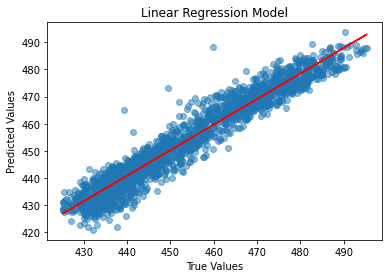

In [12]:

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression Model")

p = np.polyfit(y_test, y_pred, 1)
f = np.poly1d(p)
plt.plot(y_test, f(y_test), 'r-')

plt.show()

In [13]:
#using mse to test performance of the model

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 20.27370599968743


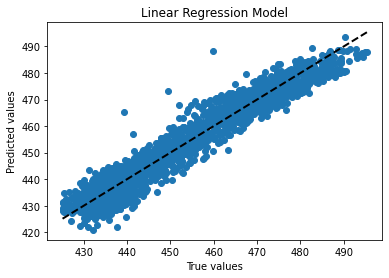

In [42]:
#scatter plot showing the relationship between the predicted and true values with a line representing a perfect fit 
#of the data (when true values and predicted values are the same)

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title("Linear Regression Model")
plt.show()

In [63]:
#Using polynomial linear regression instead and comparing it to Linear Regression

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=6)  #degree = 6 gives the lowest value for MSE 
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

linreg_poly = LinearRegression()
linreg_poly.fit(X_train_poly, y_train)
y_pred_poly = linreg_poly.predict(X_test_poly)

In [64]:
#calculating MSE of the polynomial regression on test set

mse_poly = mean_squared_error(y_test, y_pred_poly)

print(f"Polynomial MSE: {mse_poly}")

Polynomial MSE: 15.801482253223027


In [66]:
#calculating MSE of the linear regression on validation set

linreg_val = LinearRegression()
linreg_val.fit(Xtr, ytr)

ypred_val = linreg_val.predict(X_val)
mse_val = mean_squared_error(y_val, ypred_val)

print(f"Validation LR MSE: {mse_val}")

Validation LR MSE: 22.331358255132834


In [104]:
#Using polynomial linear regression on the validation set 

poly = PolynomialFeatures(degree=6)
Xtr_poly = poly.fit_transform(Xtr)
X_val_poly = poly.transform(X_val)

linreg_val_poly = LinearRegression()
linreg_val_poly.fit(Xtr_poly, ytr)
ypred_val_poly = linreg_val_poly.predict(X_val_poly)

mse_val_poly = mean_squared_error(y_val, ypred_val_poly)

print(f"Validation Polynomial MSE: {mse_val_poly}")

Validation Polynomial MSE: 19.463300784725725


In [97]:
degrees = range(1, 11)
mse_values = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    Xtr_poly = poly.fit_transform(Xtr)
    X_val_poly = poly.transform(X_val)
    linreg_val_poly = LinearRegression()
    linreg_val_poly.fit(Xtr_poly, ytr)
    ypred_val_poly = linreg_val_poly.predict(X_val_poly)
    mse_val_poly = mean_squared_error(y_val, ypred_val_poly)
    mse_values.append(mse_val_poly)

print(f"Validation Polynomial MSE: {mse_values}")

Validation Polynomial MSE: [22.3313582551328, 19.44093225177628, 18.938506018238897, 18.420389471225896, 17.993655096224597, 19.463300784725725, 17.949648829939594, 18.019671537350682, 18.034076786996167, 18.10702099018262]


In [98]:
#calculating MSE on validation set for polynomial regression and comparing it to the MSE on validation set for linear regression

mse_val_poly = mean_squared_error(y_val, ypred_val_poly)

print(f"Validation Polynomial MSE: {mse_val_poly}")

Validation Polynomial MSE: 18.10702099018262


In [76]:
for i in range(len(X_val)):
    x = X_val[i].reshape(1, -1)  # Reshape the data point to a 2D array
    y_true = y_val[i]
    ypred_val = linreg.predict(x)
    print(f"Data point {i+1}: true value = {y_true:.2f}, predicted value = {y_pred[0]:.2f}")

Data point 1: true value = 466.73, predicted value = 458.76
Data point 2: true value = 436.21, predicted value = 458.76
Data point 3: true value = 434.56, predicted value = 458.76
Data point 4: true value = 449.80, predicted value = 458.76
Data point 5: true value = 462.19, predicted value = 458.76
Data point 6: true value = 467.10, predicted value = 458.76
Data point 7: true value = 474.28, predicted value = 458.76
Data point 8: true value = 437.93, predicted value = 458.76
Data point 9: true value = 448.91, predicted value = 458.76
Data point 10: true value = 444.41, predicted value = 458.76
Data point 11: true value = 443.42, predicted value = 458.76
Data point 12: true value = 474.49, predicted value = 458.76
Data point 13: true value = 446.54, predicted value = 458.76
Data point 14: true value = 488.20, predicted value = 458.76
Data point 15: true value = 432.26, predicted value = 458.76
Data point 16: true value = 479.11, predicted value = 458.76
Data point 17: true value = 440.7

In [77]:
for i in range(len(X_val)):
    x_val_point = X_val[i]
    y_val_point = y_val[i]
    y_val_pred_point = linreg_val.predict([x_val_point])[0]
    print(f"Val Point {i}: Actual = {y_val_point:.2f}, Predicted = {y_val_pred_point:.2f}")

Val Point 0: Actual = 466.73, Predicted = 462.28
Val Point 1: Actual = 436.21, Predicted = 436.76
Val Point 2: Actual = 434.56, Predicted = 434.92
Val Point 3: Actual = 449.80, Predicted = 445.97
Val Point 4: Actual = 462.19, Predicted = 458.23
Val Point 5: Actual = 467.10, Predicted = 466.77
Val Point 6: Actual = 474.28, Predicted = 470.31
Val Point 7: Actual = 437.93, Predicted = 437.03
Val Point 8: Actual = 448.91, Predicted = 450.60
Val Point 9: Actual = 444.41, Predicted = 444.50
Val Point 10: Actual = 443.42, Predicted = 447.36
Val Point 11: Actual = 474.49, Predicted = 471.95
Val Point 12: Actual = 446.54, Predicted = 445.10
Val Point 13: Actual = 488.20, Predicted = 484.48
Val Point 14: Actual = 432.26, Predicted = 431.96
Val Point 15: Actual = 479.11, Predicted = 472.31
Val Point 16: Actual = 440.74, Predicted = 443.16
Val Point 17: Actual = 433.71, Predicted = 442.33
Val Point 18: Actual = 469.52, Predicted = 465.04
Val Point 19: Actual = 463.05, Predicted = 467.52
Val Point 

In [78]:
for i in range(len(X_val_poly)):
    x_i = X_val_poly[i]
    y_true_i = y_val[i]
    y_pred_i = linreg_val_poly.predict(x_i.reshape(1, -1))[0]
    mse_i = mean_squared_error([y_true_i], [y_pred_i])
    print(f"Point {i}: True={y_true_i}, Predicted={y_pred_i}, MSE={mse_i}")


Point 0: True=466.73, Predicted=459.593965529275, MSE=50.92298796737554
Point 1: True=436.21, Predicted=438.3472177905933, MSE=4.567699884428495
Point 2: True=434.56, Predicted=434.38225469626195, MSE=0.03159339300093152
Point 3: True=449.8, Predicted=444.1946737959952, MSE=31.419681853303143
Point 4: True=462.19, Predicted=457.7982731534139, MSE=19.28726469502505
Point 5: True=467.1, Predicted=465.7661856373743, MSE=1.779060753946684
Point 6: True=474.28, Predicted=472.717184959256, MSE=2.442390851575667
Point 7: True=437.93, Predicted=439.44112161900557, MSE=2.2834885474259976
Point 8: True=448.91, Predicted=449.50594526044733, MSE=0.35515075344961045
Point 9: True=444.41, Predicted=442.92746874112345, MSE=2.197898933546168
Point 10: True=443.42, Predicted=446.22573161478795, MSE=7.872129894220488
Point 11: True=474.49, Predicted=473.9201848621451, MSE=0.32468929132860186
Point 12: True=446.54, Predicted=444.3771788513259, MSE=4.6777953211521295
Point 13: True=488.2, Predicted=485.70

Point 1230: True=440.85, Predicted=433.3500763101474, MSE=56.248855353612356
Point 1231: True=444.69, Predicted=450.8841218834714, MSE=38.36714590729906
Point 1232: True=465.75, Predicted=464.24834973439283, MSE=2.254953520198078
Point 1233: True=450.13, Predicted=443.70361950415827, MSE=41.29836627733496
Point 1234: True=453.83, Predicted=456.3202721316338, MSE=6.201455289592171
Point 1235: True=446.33, Predicted=448.5637247951672, MSE=4.989526460544901
Point 1236: True=468.55, Predicted=471.5684113509924, MSE=9.110807083799648
Point 1237: True=473.84, Predicted=472.61569492127455, MSE=1.4989229257928616
Point 1238: True=428.52, Predicted=436.1071484338463, MSE=57.564821357216715
Point 1239: True=451.67, Predicted=446.5726218631462, MSE=25.98326387007532
Point 1240: True=436.97, Predicted=433.106986498271, MSE=14.922873314540771
Point 1241: True=442.6, Predicted=434.4827145438612, MSE=65.89032317644252
Point 1242: True=464.27, Predicted=461.13355138785846, MSE=9.837309896604474
Point 

In [79]:
mse_val_poly = mean_squared_error(y_val, ypred_val_poly)
print(f"Validation Polynomial MSE: {mse_val_poly}")


Validation Polynomial MSE: 19.463300784725725


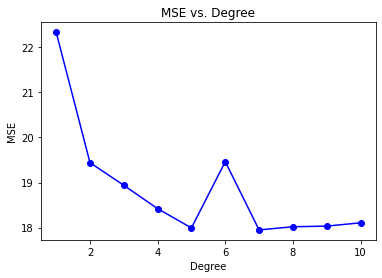

In [80]:

degrees = range(1, 11)
mse_values = []

for degree in degrees:
    # Fit polynomial regression model
    poly = PolynomialFeatures(degree=degree)
    Xtr_poly = poly.fit_transform(Xtr)
    X_val_poly = poly.transform(X_val)
    linreg_val_poly = LinearRegression()
    linreg_val_poly.fit(Xtr_poly, ytr)
    
    # Predict on validation set
    ypred_val_poly = linreg_val_poly.predict(X_val_poly)
    
    # Compute MSE
    mse_val_poly = mean_squared_error(y_val, ypred_val_poly)
    mse_values.append(mse_val_poly)
    
# Plot MSE values against degree
plt.plot(degrees, mse_values, 'bo-')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.title('MSE vs. Degree')
plt.show()
